# 1o Lab de PSD


### Número do Grupo : 2


In [ ]:
pip install scikit_dsp_comm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt
import sk_dsp_comm.sigsys as ssd
from pylab import *
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

In [ ]:
#pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
#%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

# PROBLEMA 1
Usando as funções stem() e subplot() em python (https://matplotlib.org/stable), escreva um programa que plote os seguintes sinais
$$
\begin{align}
    x_1[n] &= \sin\big(\frac{\pi}{5}n\big),\ 0\leq n \leq 15 \\
    x_2[n] &= \cos\big(\frac{3\pi}{5}n\big),\ 0\leq n \leq 15 \\
\end{align}
$$

**OBS:** Não esqueça de incluir os títulos dos eixos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


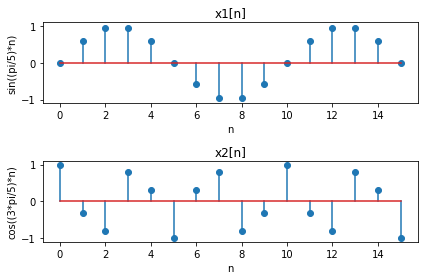

In [ ]:
#Intervalo de n
n = np.arange(0,15+1)

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

#plot sin[(pi/5)*n]

ax1.stem(n, sin((pi*n)/5))
ax1.set_title("x1[n]")
ax1.set_xlabel("n")
ax1.set_ylabel("sin((pi/5)*n)")

#plot cos[(3*pi/5)*n]

ax2.stem(n, cos((3*pi*n)/5))
ax2.set_title("x2[n]")
ax2.set_xlabel("n")
ax2.set_ylabel("cos((3*pi/5)*n)")

fig.tight_layout()
plt.show()


## Parte a - sinal $x_1[n]$
O período da fundamental, $N$, é

`adicione o resultado abaixo, explicando como ele foi determinado`

In [ ]:
# Por inspeção visual nota-se que o ciclo do sinal se repete a cada 10 segundos(período T=10s),
# no caso do sinal x1[n] o primeiro ciclo começa no tempo t=0s, após isso são passadas duas
# amplitudes(uma negativa e outra positiva) e a senóide volta a ser positiva no tempo t=10s,
# revelando assim um ciclo do sinal (T = tf - t1 -> T = 10s - 0s -> T = 10s).


## Parte b - sinal $x_2[n]$
O período da fundamental, $N$, é

`adicione o resultado abaixo, explicando como ele foi determinado`

In [ ]:
# Utilizando a fórmula N = (2*pi)*k/fa, em que: N = período do sinal que deve ser um natural,
# k = menor número natural que força N ser natural, fa = frequência angular(obtida por inspeção na lei do sinal,
# que no caso de x2[n] vale 3*pi/5). Aplicando os valores na fórmula:
# N = (2*pi)*k/(3*pi/5) -> N = 10*k/3, com isso observa-se que k = 3, forçando o período N = 10s.


# PROBLEMA 2
Usando a função `stem()` escreva um programa que plote o sinal
$$
x[n] = \begin{cases}
        2n+1, & -3\leq n\leq 3 \\
        0, & \text{otherwise}
        \end{cases}
$$
no intervalo $-8\leq n\leq 8$.

**OBS:** Criar a função $x[n]$ **sem o uso de loop!!** Observe ainda que o módulo python “sk_dsp_comm.sigsys” possui a função drect() que serve para criar uma função janela - estude o exemplo python ex2.py fornecido na aba “Material para realização dos exercícios”.

**OBS:** Não esqueça de incluir os títulos dos eixos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


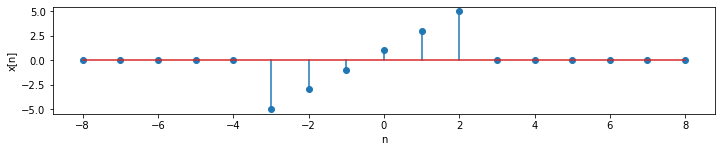

In [ ]:
#Intervalo de n
n = np.arange (-8, 8+1)
fig = plt.figure( figsize=(10,8))

#Definição da função
y1 = 2*n + 1
y2 = y1* ssd.drect(n+3, N=6)
sub1 = fig.add_subplot(411)
sub1.set_ylabel("x[n]")
sub1.set_xlabel("n")
sub1.stem(n, y2)

fig.tight_layout()
plt.show()


# PROBLEMA 3
Usando a função `stem()` escreva um programa que plote o sinal
$$
    x[n] = u[n]u[8-n] + u[n-2]-u[n-5]
$$
no intervalo $-2\leq n\leq 16$.  Observe que o módulo  `sk_dsp_comm.sigsys`  (aliased  como  `ss`)  possui a função `dstep()` definida, a qual pode tornar esse problema bastante simples.

**OBS:** Estude os exemplos ex1.py e ex2.py fornecidos na aba “Material para realização dos exercícios”.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


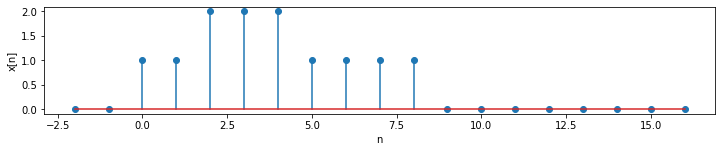

In [ ]:
#Intervalo de n
n = np.arange(-2,16+1)
fig  = plt.figure(figsize=(10,8))

#Definição da x[n]
y1 = ssd.dstep(n)*ssd.dstep(8-n) + ssd.dstep(n-2)-ssd.dstep(n-5)
sub1 = fig.add_subplot(411)
sub1.stem(n,y1)
sub1.set_ylabel("x[n]")
sub1.set_xlabel("n")

fig.tight_layout()
plt.show()




# PROBLEMA 4
Considere o sinal
$$
    y[n] = \begin{cases}
        2, & n=0 \\
        1, & n=1 \\
        -1, & n=3 \\
        3, & n=4 \\
        0, & \text{caso contrário}
    \end{cases}
$$

Escreva uma função python ($y[n]$) que implemente a equação acima para que você possa responder as questões que seguem.

**DICA:** Escreva o sinal $y[n]$ usando funções impulsos.

In [ ]:
def y(n):
    """
    Use a função dimpulse do módulo sigsys para diretamente definir
    o sinal y[n]
    """

    y = 2*ssd.dimpulse(n)+1*ssd.dimpulse(n-1)+0*ssd.dimpulse(n-2)-1*ssd.dimpulse(n-3)+3*ssd.dimpulse(n-4)

    return y

## Parte a
Usando a função `stem()` plote $z_1[n] = y[n-2]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

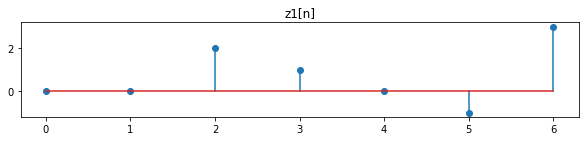

In [ ]:
n = np.arange(0,4+1+2)
fig = plt.figure(figsize=(10,8))

sub1 = fig.add_subplot(411)
sub1.set_title("z1[n]")
sub1.stem(n,y(n-2))

## Parte b
Usando a função `stem()` plote $z_2[n] = y[n+2]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

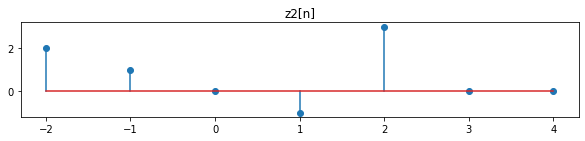

In [ ]:
n = np.arange(0-2,4+1)
fig = plt.figure(figsize=(10,8))

sub2 = fig.add_subplot(411)
sub2.set_title("z2[n]")
sub2.stem(n,y(n+2))

## Parte c
Usando a função `stem()` plote $z_3[n] = y[-n]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

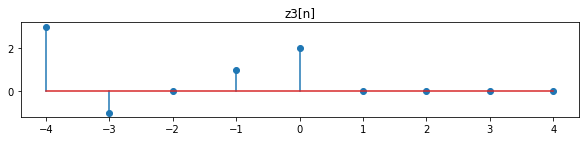

In [ ]:
n = np.arange(-4,4+1)
fig = plt.figure(figsize=(10,8))

sub3 = fig.add_subplot(411)
sub3.set_title("z3[n]")
sub3.stem(n,y(-n))

# PROBLEMA 5
Dado os sinais abaixo:
$$
\begin{align}
    x_1[n] &= \{1,2,-3,2,1,1\} \;\;\;\; h_1[n] = \{1,2,-3\}\\
    x_2[n] &= \{0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0\}$  \;\;\;\;  h_{2}[n]=\{1,4,10,16,19,16,10,4,1\}
\end{align}
$$

## Parte a
Escrever uma função na linguagem python (__"sem usar funções prontas de qualquer biblioteca"__) que implemente a operação **Soma de Convolução** indicada abaixo para fazer a __convolução__ entre dois sinais unidimensionais.

$ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k] =  \sum_{k=-\infty}^{\infty} x[n-k]h[k] $

In [ ]:
def conv(x,h):

  tamanho = len(h)+len(x)-1
  y = np.zeros(tamanho,int64)
  for n in range(0, len(x)):
    soma = 0
    for k in range(0,len(h)):
      y[n+k] += x[n]*h[k]

  return y

In [ ]:
def conv2(x,h):
    y = np.zeros(len(x)+len(h)-1,np.int64)
    xPad = np.pad(x,(0,(len(h)//2)*2))

    for n in range(len(xPad)):
      soma =0
      for k in range(len(h)):
        soma += xPad[n-k]*h[k]
      y[n] = soma
    return y


## Parte b
Faça a convolução entre os sinais $x_1*h_1$ e $x_2*h_2$ e plote os sinais originais e os resultados usando as funções stem() e subplots.

In [ ]:
x1 = np.array([1,2,-3,2,1,1])
x2 = np.array([0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0])
h1 = np.array([1,2,-3])
h2 = np.array([1,4,10,16,19,16,10,4,1])

"""
fig = plt.figure(figsize=(10,8))

sub1 = fig.add_subplot(411)
sub1.set_title("x1[n]*h1[n]")
sub1.stem(conv(x1,h1))
"""

print(conv(x1,h1))
print(conv2(x1,h1))
print(conv(x2,h2))
print(conv2(x2,h2))



[  1   4  -2 -10  14  -3  -1  -3]
[  1   4  -2 -10  14  -3  -1  -3]
[  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]
[  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]


## Parte c
De maneira similar à "Parte b" desse exercício, usando __o mesmo código da função convolução__, faça a __correlação__ entre os mesmos sinais e plote os resultados.

Dica, lembre-se que:

Convolução: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$

Correlação: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n+k]$

In [ ]:
def corr(x,h):
  return conv2(x,np.flip(h))

print(corr(x1,h1))
print(np.correlate(x1,h1, mode = "full"))

## Parte d
Utilize agora a função da biblioteca **numpy (numpy.convolve)** para realizar as mesmas convoluções da "Parte a". Use a função numpy.convolve - mode{‘full’} e discuta os resultados.

[  1   4  -2 -10  14  -3  -1  -3]
[  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


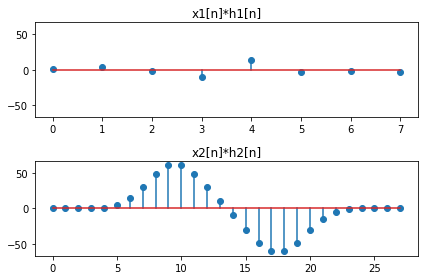

In [ ]:
x1 = np.array([1,2,-3,2,1,1])
x2 = np.array([0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0])
h1 = np.array([1,2,-3])
h2 = np.array([1,4,10,16,19,16,10,4,1])

c1 = np.convolve(x1,h1,'full')
c2 = np.convolve(x2,h2,'full')
print(c1)
print(c2)

fig, (sub1,sub2) = plt.subplots(2, 1, sharey=True)

sub1.set_title("x1[n]*h1[n]")
sub1.stem(c1)

sub2.set_title("x2[n]*h2[n]")
sub2.stem(c2)

fig.tight_layout()
plt.show()


In [ ]:
# discussão dos resultados vai aqui